# Fashion MNIST classification: simple neural network
Classification of a subset of fashion MNIST images using a simple, densely-connected neural network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf  # not used?
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from keras.models import load_model

Using TensorFlow backend.


In [3]:
from keras.models import Sequential              # class of neural networks with one layer after the other
from keras.layers.core import Dense, Activation  # type of layers
from keras.optimizers import SGD                 # Optimisers, here the stochastic gradient descent 
from keras.utils import np_utils                 # extra tools

The data are stored in the numpy array file format, in `data.zip`. Load the data:

In [4]:
all_data = np.load('data.zip')
X_train = all_data['X_train']
y_train = all_data['y_train']

In [6]:
print("X_train shape: ", X_train.shape, "y_train shape: ", y_train.shape)
print(type(X_train[0,0,0]))

X_train shape:  (20000, 28, 28) y_train shape:  (20000,)
<class 'numpy.float64'>


In [7]:
y_classes, y_class_counts = np.unique(y_train, return_counts=True)
print("y class values: ", y_classes, "\ny class counts", y_class_counts)

y class values:  [0. 1. 2. 3.] 
y class counts [5000 5000 5000 5000]


The target class is a value between 0-3.
Make text labels for the four classes:

In [5]:
LABELS = ["Sneaker", "Boot", "Shirt", "T-Shirt"]

Check how y classes are distributed across the rows:

Text(0.5, 1.0, 'distribution of y_train classes across rows')

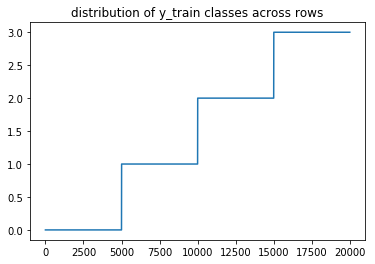

In [9]:
plt.plot(y_train)
plt.title("distribution of y_train classes across rows")

Reshape the images for use with keras, and normalise the values (to stop e.g. bright images being more significant than dark images):

In [6]:
X_train = X_train.reshape(20000, 784)
X_train /= 255.0 # normalising on (0,1)

Create training and test data from the training data, using train_test_split. 

Stratify on the target class, because the y labels are not randomly ordered across rows.

In [7]:
images_train, images_test, labels_train, labels_test = train_test_split(
    X_train, y_train, stratify=y_train, test_size = 0.1, random_state = 42)

Display some training images and labels:

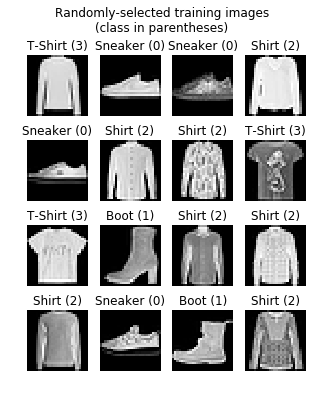

In [13]:
grid_dims = 4  # plot images in square grid, w number of rows & cols = grid_dims
grid_len = grid_dims**2
fig, axes = plt.subplots(grid_dims, grid_dims, figsize=(grid_dims+1, grid_dims+2))
fig.suptitle("Randomly-selected training images\n(class in parentheses)")
for i in range(0,grid_len):
    row, col = divmod(i, grid_dims)
    axes[row,col].axis('off')
    image_index = np.random.randint(images_train.shape[0]-grid_len)
    response = int(labels_train[image_index])
    sub_title = LABELS[response] + " (" + str(response) + ")"
    axes[row,col].set_title(sub_title)
    axes[row,col].imshow(images_train[image_index].reshape(28, 28), cmap="gray")

Display some test images (no labels)

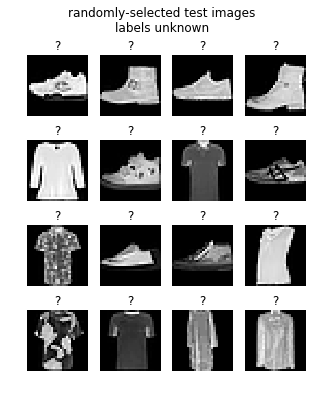

In [14]:
grid_dims = 4  # plot images in square grid, w number of rows & cols = grid_dims
grid_len = grid_dims**2
fig, axes = plt.subplots(grid_dims, grid_dims, figsize=(grid_dims+1, grid_dims+2))
fig.suptitle("randomly-selected test images\nlabels unknown")
for i in range(0, grid_len):
    row, col = divmod(i, grid_dims)
    axes[row,col].axis('off')
    image_index = np.random.randint(images_test.shape[0]-grid_len)
    sub_title = "?"
    axes[row,col].set_title(sub_title)
    axes[row,col].imshow(images_test[image_index].reshape(28, 28), cmap="gray")

Convert each y class value (integer value 0-3) to an array of 4 categories (each with value 0-1):

In [15]:
labels_train.shape

(18000,)

In [8]:
nb_classes = 4
labels_train = np_utils.to_categorical(labels_train, nb_classes)
labels_test = np_utils.to_categorical(labels_test, nb_classes)

In [17]:
labels_train

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [18]:
labels_train.shape

(18000, 4)

Make a densely-connected neural network model with 3 layers (input, hidden, and output):

In [19]:
# First, declare a model with a sequential architecture
model = Sequential()

# Then add a first layer with 500 nodes and 784 inputs (the pixels of the image)
# and a 'relu' activation function to use on the nodes of that first layer
model.add(Dense(500,input_shape=(784,)))
model.add(Activation('relu'))

# Second hidden layer with 300 nodes
model.add(Dense(300))
model.add(Activation('relu'))

# Output layer with 4 categories (using softmax activation)
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

Use categorical_crossentropy loss function (for categorical outputs), and accuracy as the metric.

In [20]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=["accuracy"])

Select hyperparameters and fit the model:

Batch size should be large and divide into the training set size exactly (for speed), while still presenting a few tens of batches each epoch.

Show validation data output as well as training accuracy, because a neural network can easily converge to an overfitted solution that is excellent on the training set and rubbbish on the test set.

In [32]:
model_fit = model.fit(images_train, labels_train,
          batch_size=200,
          epochs=20,
          verbose=2,
          validation_data = (images_test, labels_test))

Train on 18000 samples, validate on 2000 samples
Epoch 1/20
 - 1s - loss: 0.0623 - acc: 0.9744 - val_loss: 0.2549 - val_acc: 0.9175
Epoch 2/20
 - 1s - loss: 0.0626 - acc: 0.9750 - val_loss: 0.2492 - val_acc: 0.9205
Epoch 3/20
 - 1s - loss: 0.0627 - acc: 0.9752 - val_loss: 0.2698 - val_acc: 0.9245
Epoch 4/20
 - 1s - loss: 0.0549 - acc: 0.9776 - val_loss: 0.2783 - val_acc: 0.9210
Epoch 5/20
 - 1s - loss: 0.0551 - acc: 0.9774 - val_loss: 0.2591 - val_acc: 0.9215
Epoch 6/20
 - 1s - loss: 0.0477 - acc: 0.9801 - val_loss: 0.3385 - val_acc: 0.9070
Epoch 7/20
 - 1s - loss: 0.0521 - acc: 0.9791 - val_loss: 0.2789 - val_acc: 0.9250
Epoch 8/20
 - 1s - loss: 0.0500 - acc: 0.9802 - val_loss: 0.3127 - val_acc: 0.9175
Epoch 9/20
 - 1s - loss: 0.0497 - acc: 0.9798 - val_loss: 0.3039 - val_acc: 0.9160
Epoch 10/20
 - 1s - loss: 0.0517 - acc: 0.9774 - val_loss: 0.3135 - val_acc: 0.9215
Epoch 11/20
 - 1s - loss: 0.0434 - acc: 0.9823 - val_loss: 0.3403 - val_acc: 0.9160
Epoch 12/20
 - 1s - loss: 0.0452 - a

Save the model. This preserves it between notebook sessions, and training can also be continued on from the saved, partially-trained state (accuracy & validation will show if this is useful)

Manage the saved model filenames carefully to avoid overwriting different models etc.:

In [22]:
model.save('fmnist_simpleNN.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

Load the model, to show it works :-)

In [9]:
# returns a compiled model
# identical to the previous one
model = load_model('fmnist_simpleNN.h5')

Predict test image category probabilities:

In [10]:
y_probs = model.predict(images_test)

Rather than returning the category, these are probabilities of each category:

In [11]:
y_probs

array([[1.0514321e-08, 1.4025720e-08, 9.9999011e-01, 9.9210338e-06],
       [1.4173919e-09, 8.3660268e-08, 3.6844378e-04, 9.9963140e-01],
       [2.4984341e-09, 9.1177078e-08, 1.8765462e-03, 9.9812335e-01],
       ...,
       [4.9572403e-12, 4.5446558e-09, 9.9946851e-01, 5.3149904e-04],
       [1.1051383e-12, 1.5438277e-10, 9.9999726e-01, 2.7225572e-06],
       [9.9984848e-01, 1.4958087e-04, 1.7695645e-07, 1.7748571e-06]],
      dtype=float32)

Define a function to pick the most-probable category for each image:

In [12]:
def GetCorrectClass(y_pred):
    answers = np.zeros(len(y_pred), dtype=np.int)
    for idx, result in enumerate(y_pred):
        objectclass = np.argmax(result)
#         print(objectclass)
        answers[idx] = objectclass
    return answers

Get the most-probable classes for the predictions: 

In [13]:
y_pred = GetCorrectClass(y_probs)

In [24]:
y_true = GetCorrectClass(labels_test)

In [25]:
metrics.accuracy_score(y_true, y_pred)

0.922

In [30]:
misp_images = images_test[y_true!=y_pred]
print(" number of mis-predicted images is: ", misp_images.shape[0])

 number of mis-predicted images is:  156


Show a random set of mis-predicted test images with predicted labels:

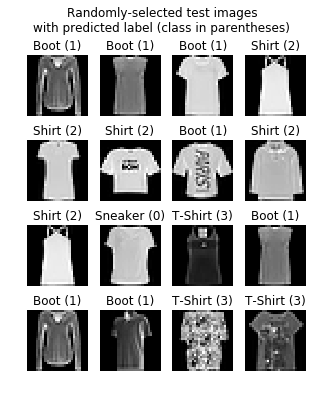

In [31]:
grid_dims = 4  # plot images in square grid, w number of rows & cols = grid_dims
grid_len = grid_dims**2
fig, axes = plt.subplots(grid_dims, grid_dims, figsize=(grid_dims+1, grid_dims+2))
fig.suptitle("Randomly-selected test images\nwith predicted label (class in parentheses)")
for i in range(0, grid_len):
    row, col = divmod(i, grid_dims)
    axes[row,col].axis('off')
    image_index = np.random.randint(misp_images.shape[0]-grid_len)
    response = int(y_pred[image_index])
    sub_title = LABELS[response] + " (" + str(response) + ")"
    axes[row,col].set_title(sub_title)
    axes[row,col].imshow(misp_images[image_index].reshape(28, 28), cmap="gray")

Plot the model's fit history (thanks to https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/ )

Text(0.5, 1.0, 'training accuracy')

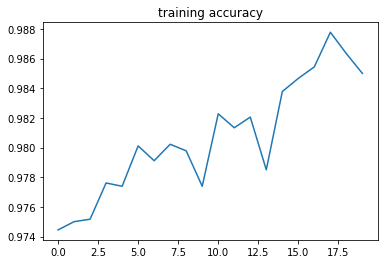

In [37]:
plt.plot(model_fit.history['acc'])
plt.title("training accuracy")

Text(0.5, 1.0, 'validation accuracy')

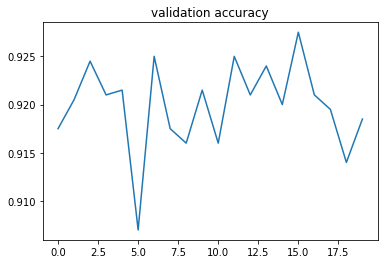

In [39]:
plt.plot(model_fit.history['val_acc'])
plt.title("validation accuracy")

Text(0.5, 1.0, 'training loss')

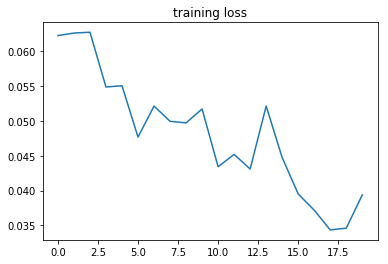

In [41]:
plt.plot(model_fit.history['loss'])
plt.title("training loss")

Text(0.5, 1.0, 'validation loss')

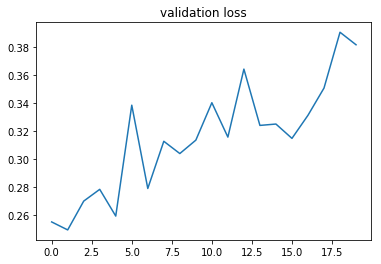

In [42]:
plt.plot(model_fit.history['val_loss'])
plt.title("validation loss")

The validation progression is not great. Even though test accuracy is a lot better than random. 

